<center><h1>Biomedical Data Analysis</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### Name: Josephina Zhenni Bian
### Github username: Josephina-Bian
### USC ID: 4158430979

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Get the Vertebral Column Data Set

In [2]:
data = arff.loadarff('./../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
#print(df)
df.replace(b'Abnormal', 1,inplace=True)
df.replace(b'Normal', 0, inplace=True) 
#print(df)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

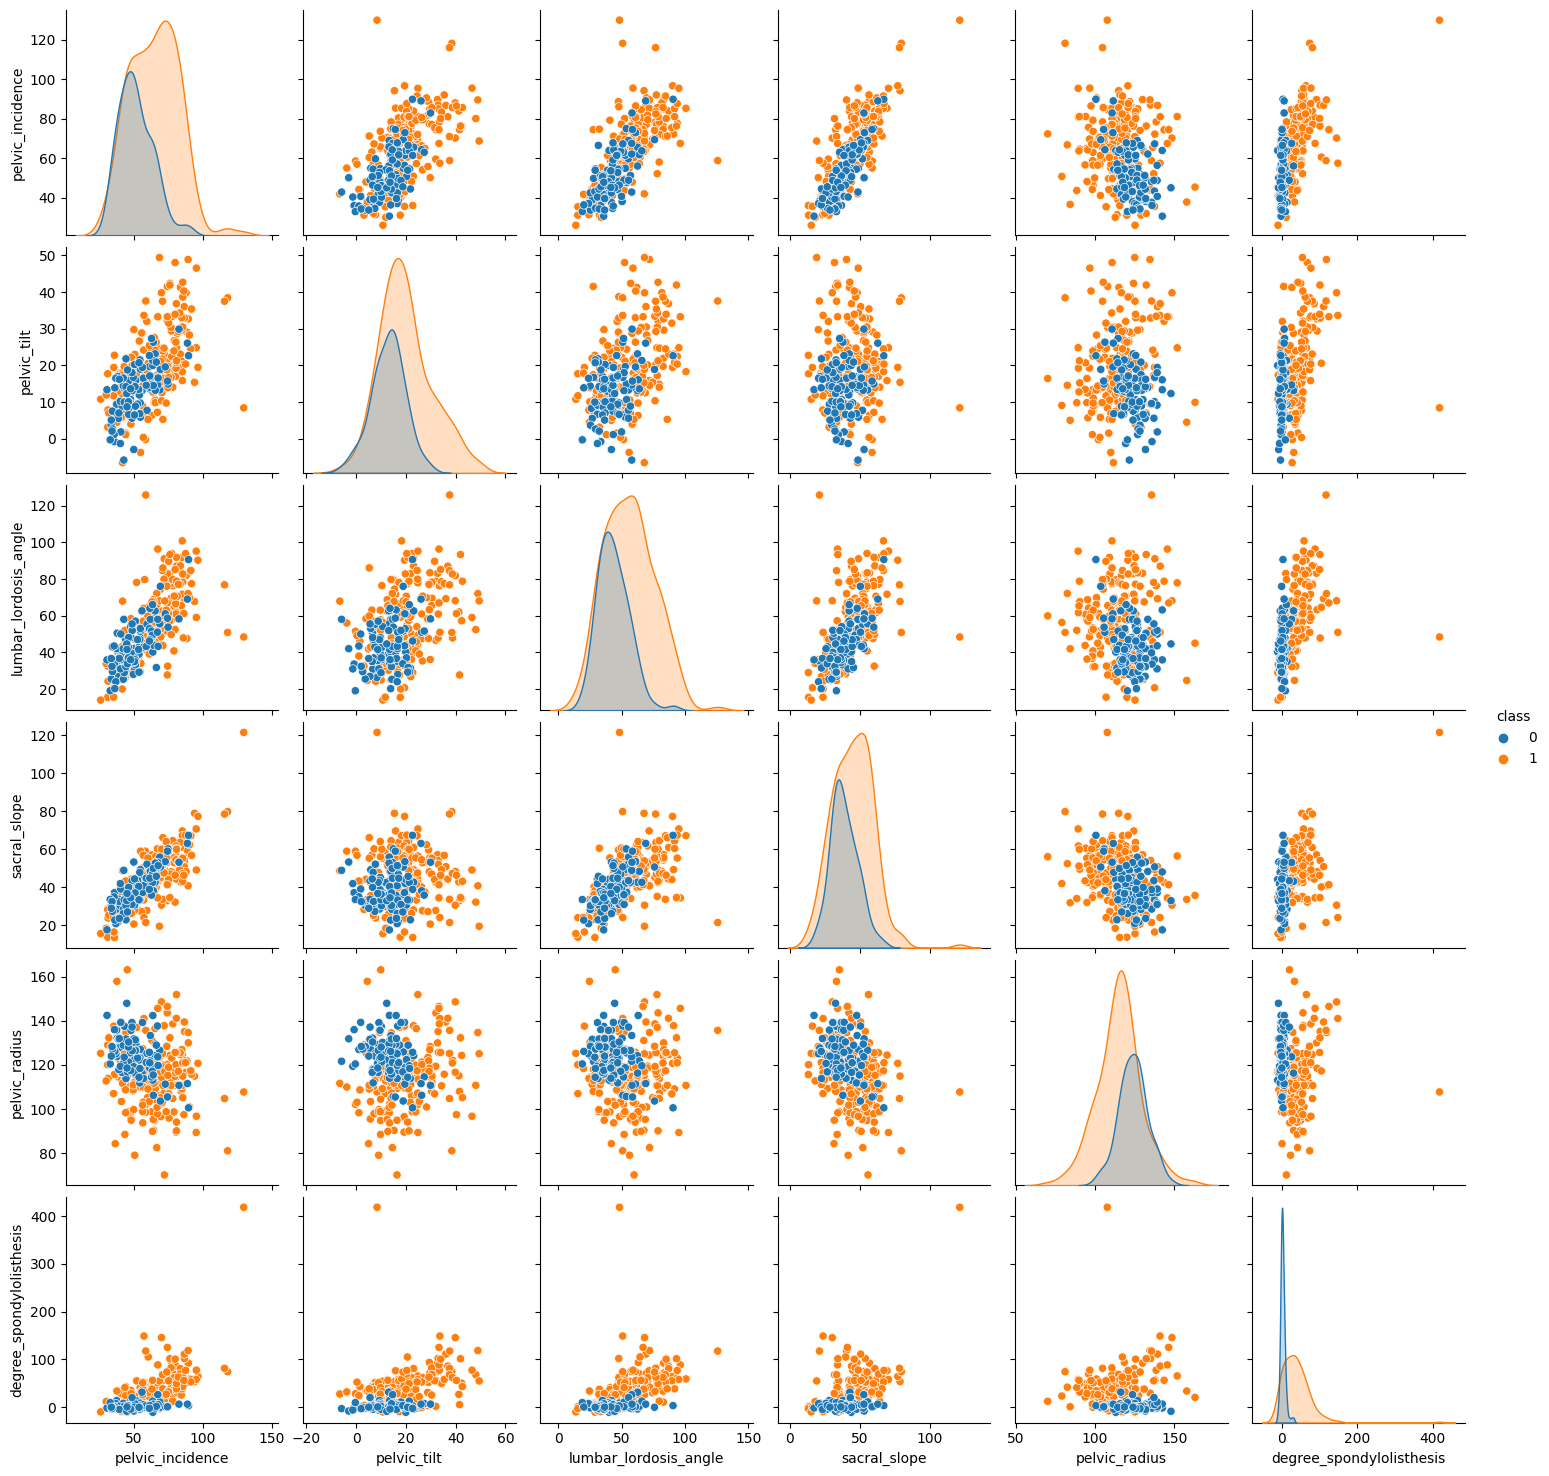

In [3]:
sns.pairplot(data=df, kind="scatter", hue="class")

#### ii. Boxplots

<AxesSubplot: title={'center': '\nBoxplot6: degree_spondylolisthesis vs class'}, xlabel='class', ylabel='degree_spondylolisthesis'>

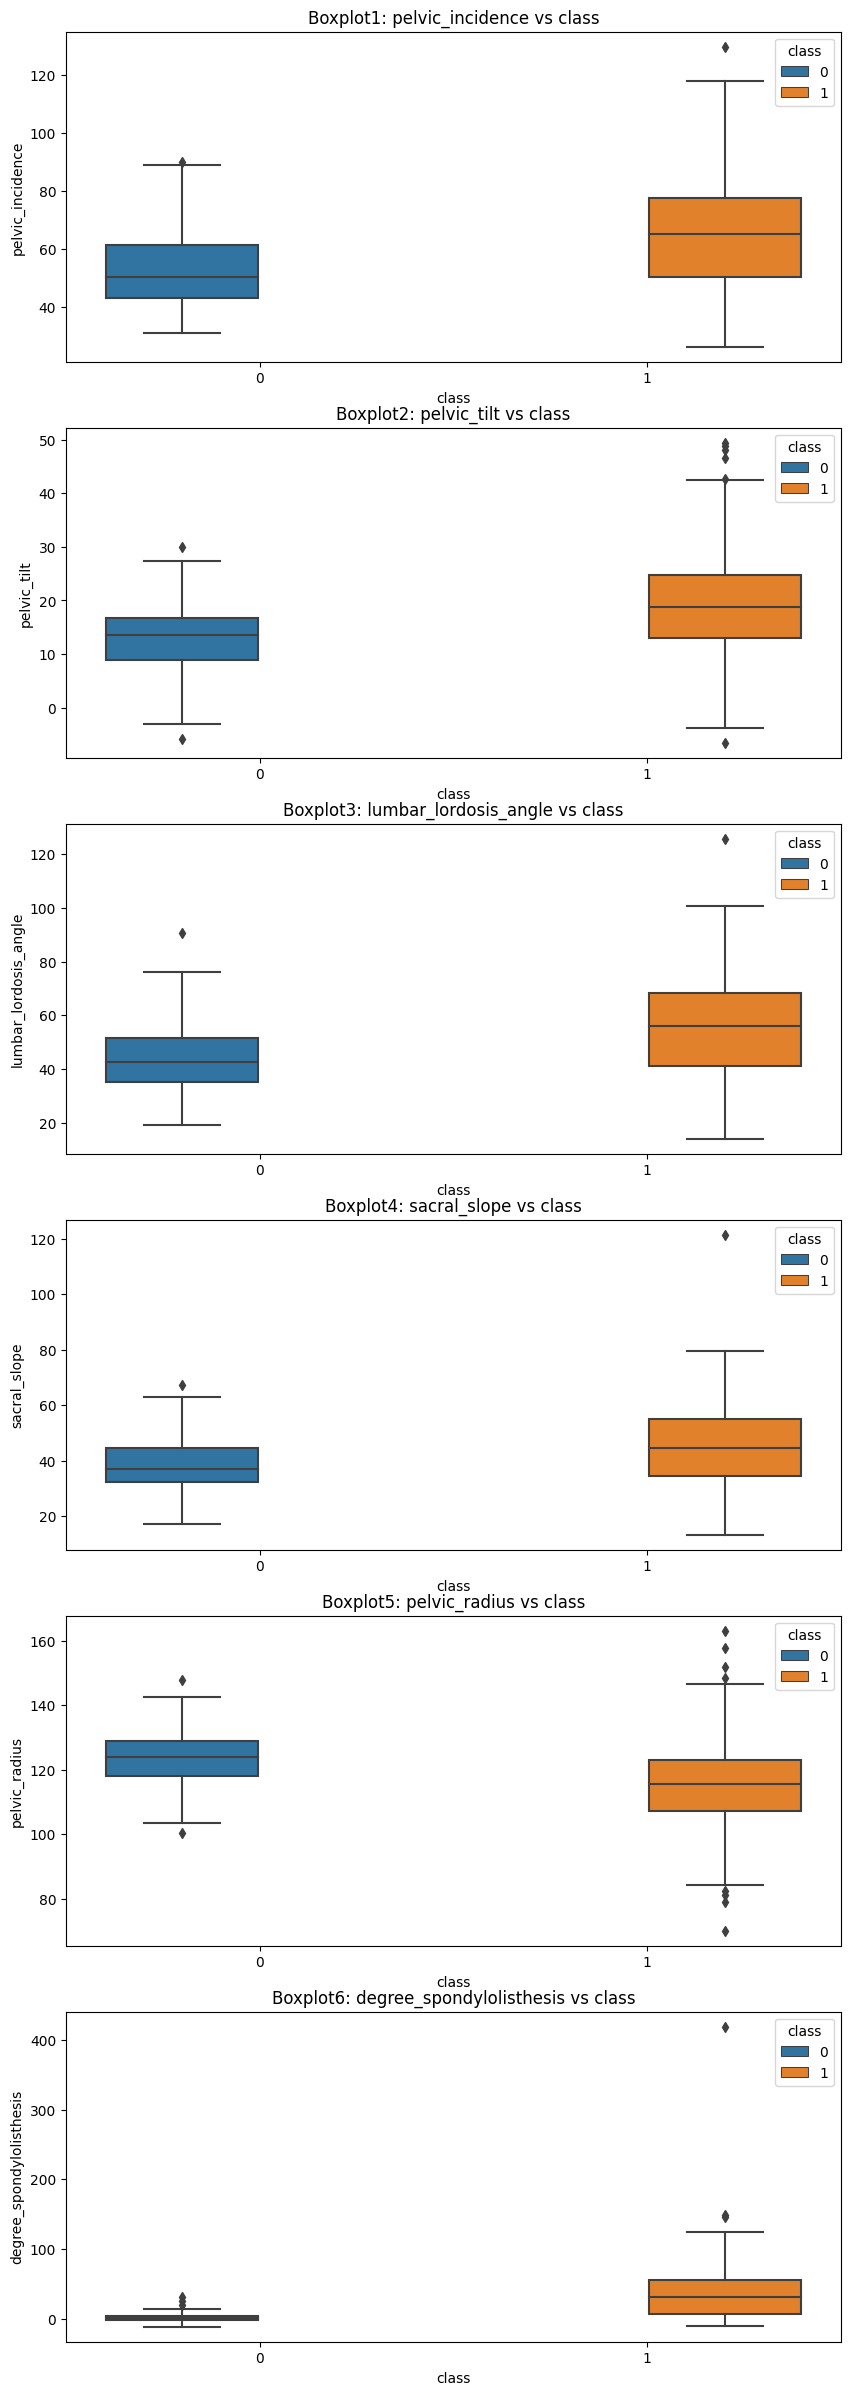

In [4]:
fig,axes = plt.subplots(nrows=6, ncols=1, figsize=(10,30))
#fig.suptitle('Header for the Boxplots')
axes[0].set_title("Boxplot1: pelvic_incidence vs class")
sns.boxplot(ax=axes[0], x='class', y='pelvic_incidence',data=df, hue='class')
axes[1].set_title("\nBoxplot2: pelvic_tilt vs class")
sns.boxplot(ax=axes[1], x='class', y='pelvic_tilt',data=df, hue='class')
axes[2].set_title("\nBoxplot3: lumbar_lordosis_angle vs class")
sns.boxplot(ax=axes[2], x='class', y='lumbar_lordosis_angle',data=df, hue='class')
axes[3].set_title("\nBoxplot4: sacral_slope vs class")
sns.boxplot(ax=axes[3], x='class', y='sacral_slope',data=df, hue='class')
axes[4].set_title("\nBoxplot5: pelvic_radius vs class")
sns.boxplot(ax=axes[4], x='class', y='pelvic_radius',data=df, hue='class')
axes[5].set_title("\nBoxplot6: degree_spondylolisthesis vs class")
sns.boxplot(ax=axes[5], x='class', y='degree_spondylolisthesis',data=df, hue='class')

#### iii. Split Data Set into Train and Test Data

In [5]:
#using pandas:

class_1 = df[df['class']==1]
class_0 = df[df['class']==0]

training_set = pd.concat([class_1[:140],class_0[:70]])
testing_set = pd.concat([class_1[140:],class_0[70:]])

#print(training_set)
#print(testing_set)

x_train = training_set.iloc[:,0:6]
y_train = training_set.iloc[:,6]
    
x_test = testing_set.iloc[:,0:6]
y_test = testing_set.iloc[:,6]

#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

In [6]:

''''
#using train_test_split:

class_1 = df[df['class']==1]
class_0 = df[df['class']==0]
x1 = class_1[class_1.columns[:6]]
y1 = class_1[class_1.columns[6]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,train_size=140)
#print(x1_train,x1_test,y1_train,y1_test)
x0 = class_0[class_0.columns[:6]]
y0 = class_0[class_0.columns[6]]
x0_train, x0_test, y0_train, y0_test = train_test_split(x0,y0,train_size=70)
#print(x0_train,x0_test,y0_train,y0_test)
x_train = pd.concat([x1_train , x0_train])
y_train = pd.concat([y1_train , y0_train])
#print(x_train)
#print(y_train)
x_test = pd.concat([x1_test , x0_test])
y_test = pd.concat([y1_test , y0_test])
#print(x_test)
#print(y_test)
'''

"'\n#using train_test_split:\n\nclass_1 = df[df['class']==1]\nclass_0 = df[df['class']==0]\nx1 = class_1[class_1.columns[:6]]\ny1 = class_1[class_1.columns[6]]\nx1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,train_size=140)\n#print(x1_train,x1_test,y1_train,y1_test)\nx0 = class_0[class_0.columns[:6]]\ny0 = class_0[class_0.columns[6]]\nx0_train, x0_test, y0_train, y0_test = train_test_split(x0,y0,train_size=70)\n#print(x0_train,x0_test,y0_train,y0_test)\nx_train = pd.concat([x1_train , x0_train])\ny_train = pd.concat([y1_train , y0_train])\n#print(x_train)\n#print(y_train)\nx_test = pd.concat([x1_test , x0_test])\ny_test = pd.concat([y1_test , y0_test])\n#print(x_test)\n#print(y_test)\n"

### (c) Classification

#### i. KNN with Euclidean Metric

In [7]:
def knnfunction(k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)


#### ii. Test Data for the most suitable k

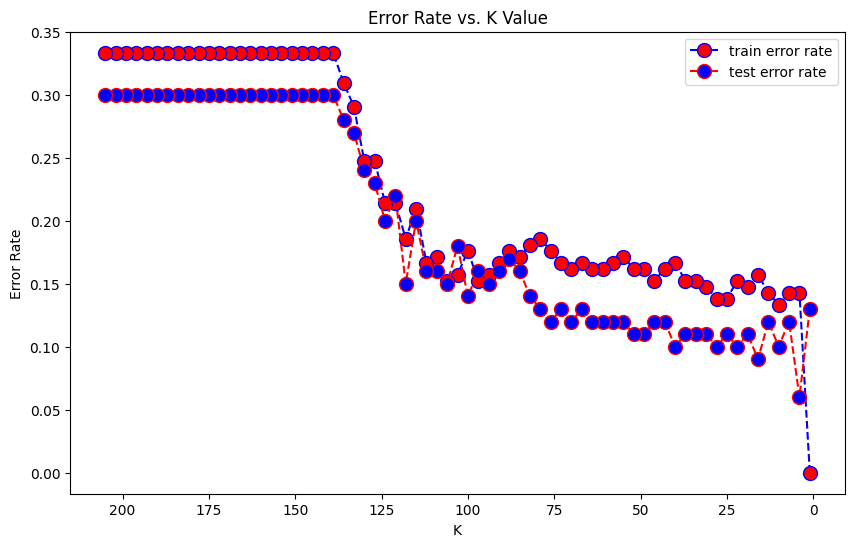

The best k with the minimum test error is 4

Here is the confusion matrix:
 [[25  5]
 [ 1 69]]

The true postive rate is 0.9857142857142858
The true negative rate is 0.8333333333333334
The precision is 0.9324324324324325
The f1-score is 0.9583333333333333

Check with the classification report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



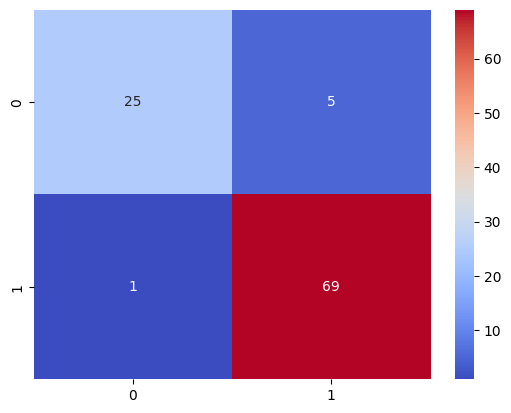

In [8]:
train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,208,3):
    #print(k)
    knn = knnfunction(k)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)

plt.figure(figsize=(10,6))
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.gca().invert_xaxis()
plt.ylabel('Error Rate')
plt.show()

#print("Minimum train error:-",min(train_error_lst))    
#print("Minimum test error:-",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('The best k with the minimum test error is', best_k)



#confusion matrix, true positive rate, true negative rate, precision, F1 score:

neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(x_train,y_train)  #we are training our model again
y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_test,y_test_predicted))
tn,fp,fn,tp = metrics.confusion_matrix(y_test,y_test_predicted).ravel()
#print(tn,fp,fn,tp)
true_positive_rate = tp/(tp+fn)
true_negative_rate = tn/(tn+fp)
print("\nThe true postive rate is", true_positive_rate)
print("The true negative rate is", true_negative_rate)
precision = float(tp/(tp+fp))
print("The precision is", precision)
recall = float(tp/(tp+fn))
f_score = ((recall*precision)/(recall+precision))*2
print("The f1-score is", f_score)
#pre,rec,fbet,sup = metrics.precision_recall_fscore_support(y_test,y_test_predicted)
#print("pre",pre)
#print("rec",rec)
#print("fbet,",fbet)
print("\nCheck with the classification report:")
print(metrics.classification_report(y_test,y_test_predicted))
sns.heatmap(metrics.confusion_matrix(y_test,y_test_predicted), cmap="coolwarm", annot=True)
plt.show()

#### iii. Learning Curve

When N is 10 the best k with the minimum test error is 1
When N is 20 the best k with the minimum test error is 6
When N is 30 the best k with the minimum test error is 1
When N is 40 the best k with the minimum test error is 11
When N is 50 the best k with the minimum test error is 16
When N is 60 the best k with the minimum test error is 21
When N is 70 the best k with the minimum test error is 26
When N is 80 the best k with the minimum test error is 31
When N is 90 the best k with the minimum test error is 41
When N is 100 the best k with the minimum test error is 46
When N is 110 the best k with the minimum test error is 6
When N is 120 the best k with the minimum test error is 16
When N is 130 the best k with the minimum test error is 16
When N is 140 the best k with the minimum test error is 16
When N is 150 the best k with the minimum test error is 16
When N is 160 the best k with the minimum test error is 6
When N is 170 the best k with the minimum test error is 6
When N is 18

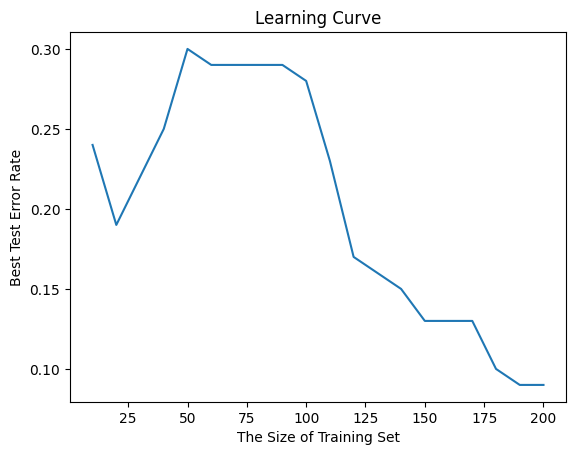

In [9]:
N = np.arange(10,210,10)
train_error_lst2 = []
test_error_lst2 = []

for n in N:
    #print("n",n)
    num_class_0 = math.floor(n/3)
    num_class_1 = math.floor(n-(n/3))
    #print('num_class_0:', num_class_0)
    #print('num_class_1:', num_class_1)
    
    training_set2 = pd.concat([class_1[:num_class_1],class_0[:num_class_0]])
    x_train = training_set2.iloc[:,0:6]
    y_train = training_set2.iloc[:,6]
    
    #print('training_set2',training_set2)
    
    train_error_lst_tem = []
    test_error_lst_tem = []
    k_value_lst_tem = []
    
    for k in range(1,n,5):
        #print('k',k)
    
        knn = knnfunction(k)
        test_error = knn[0]
        train_error = knn[1]
        train_error_lst_tem.append(train_error)
        test_error_lst_tem.append(test_error)
        k_value_lst_tem.append(k)
        #print('train_error_lst:',train_error_lst)
        #print('test_error_lst:', test_error_lst)

    #print("Minimum train error:-",min(train_error_lst_tem))    
    #print("Minimum test error:-",min(test_error_lst))
    best_k = k_value_lst_tem[test_error_lst_tem.index(min(test_error_lst_tem))]
    print('When N is', n, 'the best k with the minimum test error is', best_k)
    
    test_error_lst2.append(min(test_error_lst_tem))

#print('\nThe list of best test error rate:\n',test_error_lst2)

plt.plot(N, test_error_lst2)
plt.xlabel('The Size of Training Set')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [10]:
def knnfunction_manhattan(k,p):
    neigh = KNeighborsClassifier(n_neighbors=k, p=p)
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

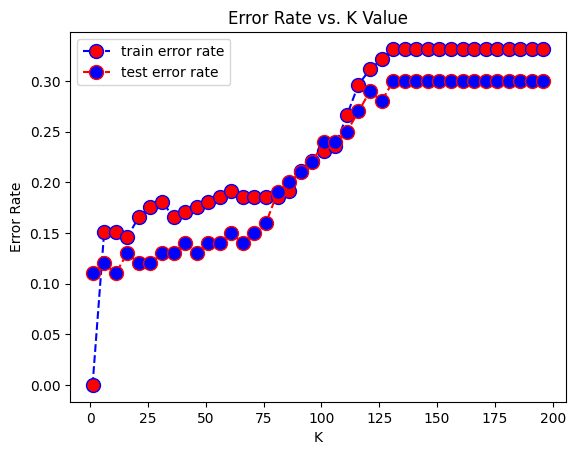

      K  test error
0     1        0.11
1     6        0.12
2    11        0.11
3    16        0.13
4    21        0.12
5    26        0.12
6    31        0.13
7    36        0.13
8    41        0.14
9    46        0.13
10   51        0.14
11   56        0.14
12   61        0.15
13   66        0.14
14   71        0.15
15   76        0.16
16   81        0.19
17   86        0.20
18   91        0.21
19   96        0.22
20  101        0.24
21  106        0.24
22  111        0.25
23  116        0.27
24  121        0.29
25  126        0.28
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30

The best k with the minimum test error is 1
As 1 is always the default k value for least test error rate and it produces overfitting, thus we may look for the second best K with t

In [11]:
train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_manhattan(k,1)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure()
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:-",min(train_error_lst))    
#print("Minimum test error:-",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nThe best k with the minimum test error is', best_k)

#choose the k with the second least test error
test_error_lst.remove(min(test_error_lst))
k_value_lst.remove(best_k)
second_best_k_value = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('As 1 is always the default k value for least test error rate and it produces overfitting, thus we may look for the second best K with the second least test error, which is', second_best_k_value)
  

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [12]:
p_lst = []
for degree in np.arange(0.1,1.1,0.1):
    #print('degree',degree)
    p = 10**float(degree)
    #print(math.log10(p))
    #print('p',p)
    p_lst.append(p)
    #print(math.pow(10,degree))
#print(p_lst)


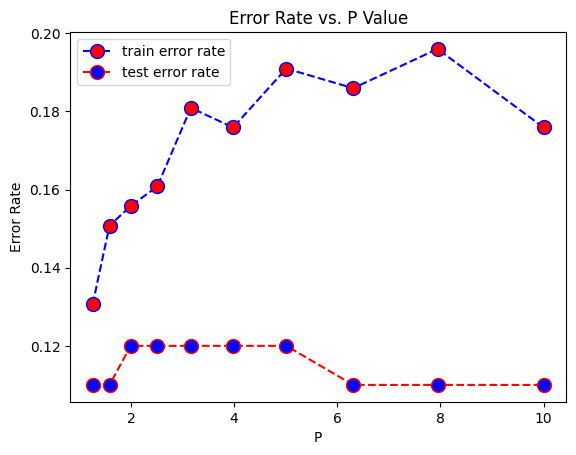

           P  test error
0   1.258925        0.11
1   1.584893        0.11
2   1.995262        0.12
3   2.511886        0.12
4   3.162278        0.12
5   3.981072        0.12
6   5.011872        0.12
7   6.309573        0.11
8   7.943282        0.11
9  10.000000        0.11

The best p is 1.2589254117941673
The best log10(p) with the minimum test error rate is 0.1


In [13]:
train_error_lst = []
test_error_lst = []
p_value_lst = []
for p in p_lst:
    #print(second_best_k_value, p)
    knn = knnfunction_manhattan(second_best_k_value,p)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    p_value_lst.append(p)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('p_value_lst', p_value_lst)

plt.figure()
plt.plot(p_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(p_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. P Value')
plt.xlabel('P')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,p_value_lst).reset_index()
table.columns = ['P', 'test error']
print(table)

#print("Minimum train error:",min(train_error_lst))    
#print("Minimum test error:",min(test_error_lst))
best_p = p_value_lst[test_error_lst.index(min(test_error_lst))]
print("\nThe best p is", best_p)
print('The best log10(p) with the minimum test error rate is', '{:.1f}'.format(math.log10(best_p)))

##### C. Chebyshev Distance With p -> infinity.

In [14]:
def knnfunction_chebyshev(k):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

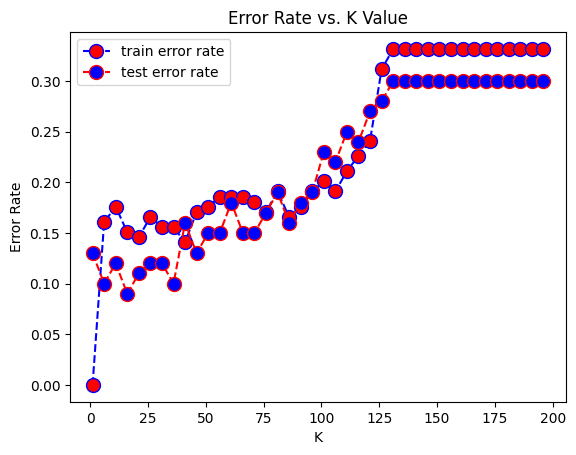

      K  test error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.09
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.16
9    46        0.13
10   51        0.15
11   56        0.15
12   61        0.18
13   66        0.15
14   71        0.15
15   76        0.17
16   81        0.19
17   86        0.16
18   91        0.18
19   96        0.19
20  101        0.23
21  106        0.22
22  111        0.25
23  116        0.24
24  121        0.27
25  126        0.28
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30

The best k with the minimum test error rate is 16


In [15]:
train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_chebyshev(k)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure()
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:",min(train_error_lst))    
#print("Minimum test error:",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nThe best k with the minimum test error rate is', best_k)

#### ii. Mahalanobis Distance.

In [16]:
def knnfunction_mahalanobis(k):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'VI':np.cov(x_train,rowvar=False)})
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

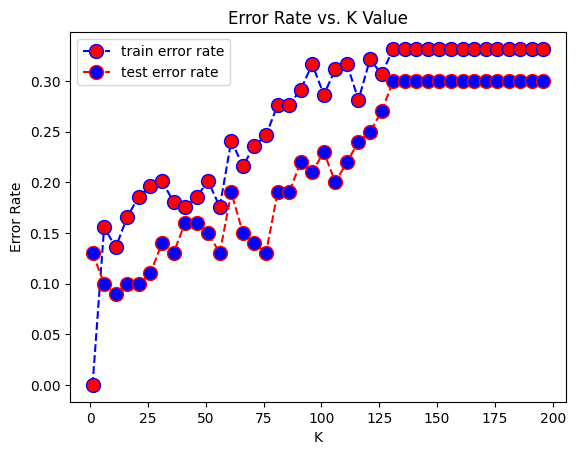

      K  test error
0     1        0.13
1     6        0.10
2    11        0.09
3    16        0.10
4    21        0.10
5    26        0.11
6    31        0.14
7    36        0.13
8    41        0.16
9    46        0.16
10   51        0.15
11   56        0.13
12   61        0.19
13   66        0.15
14   71        0.14
15   76        0.13
16   81        0.19
17   86        0.19
18   91        0.22
19   96        0.21
20  101        0.23
21  106        0.20
22  111        0.22
23  116        0.24
24  121        0.25
25  126        0.27
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30

The best k with the minimum test error is 11


In [17]:
train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_mahalanobis(k)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure()
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:",min(train_error_lst))    
#print("Minimum test error:",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nThe best k with the minimum test error is', best_k)

### (e) Weighted Decision
The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater in
uence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k 2 f1; 6; 11; 16; : : : ; 196g.

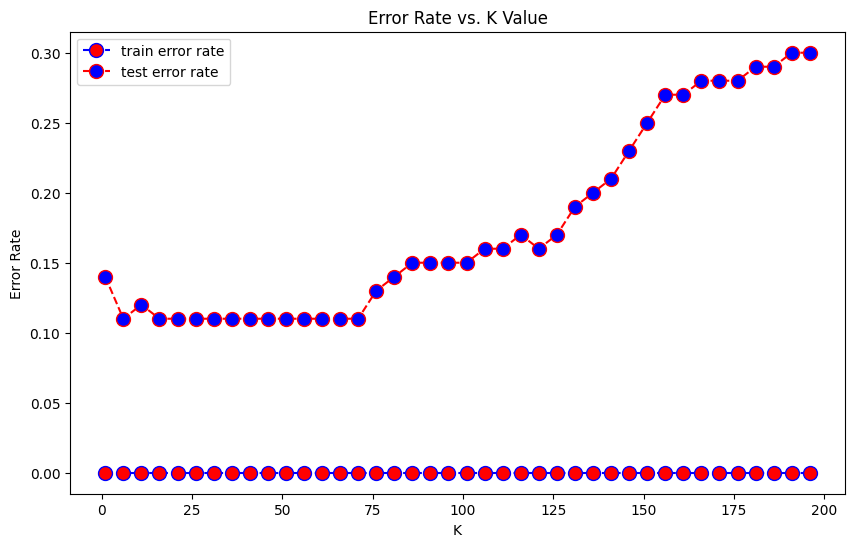

      K  test error
0     1        0.14
1     6        0.11
2    11        0.12
3    16        0.11
4    21        0.11
5    26        0.11
6    31        0.11
7    36        0.11
8    41        0.11
9    46        0.11
10   51        0.11
11   56        0.11
12   61        0.11
13   66        0.11
14   71        0.11
15   76        0.13
16   81        0.14
17   86        0.15
18   91        0.15
19   96        0.15
20  101        0.15
21  106        0.16
22  111        0.16
23  116        0.17
24  121        0.16
25  126        0.17
26  131        0.19
27  136        0.20
28  141        0.21
29  146        0.23
30  151        0.25
31  156        0.27
32  161        0.27
33  166        0.28
34  171        0.28
35  176        0.28
36  181        0.29
37  186        0.29
38  191        0.30
39  196        0.30

For weighted voting with Euclidean distance, the best k with the minimum test error is 6


In [18]:
#Weighted Voting with Euclidean distance
def knnfunction_weighted(k):
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_weighted(k)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure(figsize=(10,6))
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:-",min(train_error_lst))    
#print("Minimum test error:-",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nFor weighted voting with Euclidean distance, the best k with the minimum test error is', best_k)


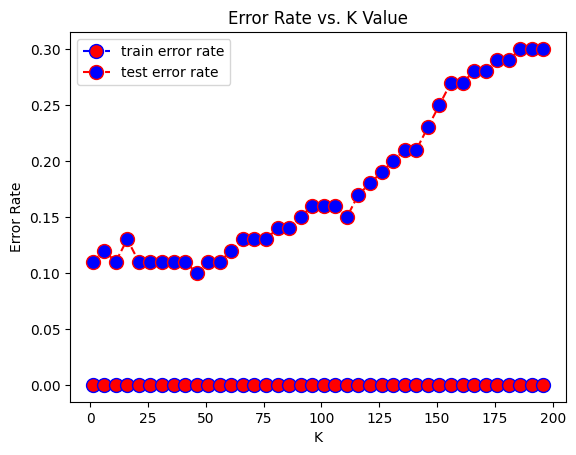

      K  test error
0     1        0.11
1     6        0.12
2    11        0.11
3    16        0.13
4    21        0.11
5    26        0.11
6    31        0.11
7    36        0.11
8    41        0.11
9    46        0.10
10   51        0.11
11   56        0.11
12   61        0.12
13   66        0.13
14   71        0.13
15   76        0.13
16   81        0.14
17   86        0.14
18   91        0.15
19   96        0.16
20  101        0.16
21  106        0.16
22  111        0.15
23  116        0.17
24  121        0.18
25  126        0.19
26  131        0.20
27  136        0.21
28  141        0.21
29  146        0.23
30  151        0.25
31  156        0.27
32  161        0.27
33  166        0.28
34  171        0.28
35  176        0.29
36  181        0.29
37  186        0.30
38  191        0.30
39  196        0.30

For weighted voting with Manhattan distance, the best k with the minimum test error is 46


In [19]:
#Weighted voting with Manhattan Distance
def knnfunction_manhattan_weighted(k,p):
    neigh = KNeighborsClassifier(n_neighbors=k, p=p, weights='distance')
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_manhattan_weighted(k,1)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure()
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:-",min(train_error_lst))    
#print("Minimum test error:-",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nFor weighted voting with Manhattan distance, the best k with the minimum test error is', best_k)

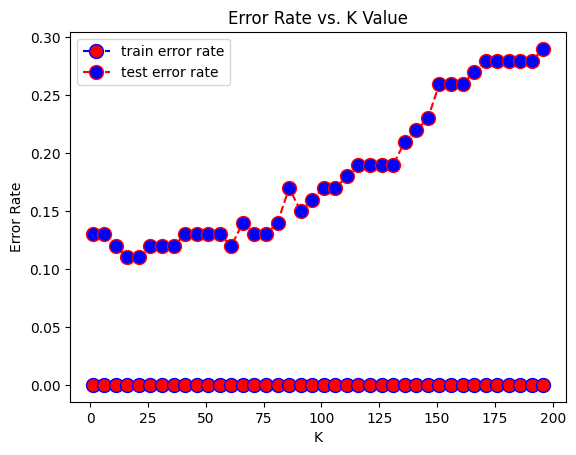

      K  test error
0     1        0.13
1     6        0.13
2    11        0.12
3    16        0.11
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.12
8    41        0.13
9    46        0.13
10   51        0.13
11   56        0.13
12   61        0.12
13   66        0.14
14   71        0.13
15   76        0.13
16   81        0.14
17   86        0.17
18   91        0.15
19   96        0.16
20  101        0.17
21  106        0.17
22  111        0.18
23  116        0.19
24  121        0.19
25  126        0.19
26  131        0.19
27  136        0.21
28  141        0.22
29  146        0.23
30  151        0.26
31  156        0.26
32  161        0.26
33  166        0.27
34  171        0.28
35  176        0.28
36  181        0.28
37  186        0.28
38  191        0.28
39  196        0.29

For weighted voting with Chebyshev distance, the best k with the minimum test error is 16


In [20]:
#Weighted voting with Chebyshev Distance
def knnfunction_chebyshev_weighted(k):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    neigh.fit(x_train,y_train)  #we are training our model
    y_test_predicted = neigh.predict(x_test) #we are predicting y for test data
    y_train_predicted = neigh.predict(x_train)  #we are prediction y for train data
    test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)
    #print("The test accuracy for k=",k, "is",test_accuracy)
    #print("The train accuracy for k=",k, "is",train_accuracy)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    return (test_error, train_error)

train_error_lst = []
test_error_lst = []
k_value_lst = []
for k in range(1,197,5):
    #print(k)
    knn = knnfunction_chebyshev_weighted(k)
    test_error = knn[0]
    train_error = knn[1]
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)
    k_value_lst.append(k)
#print('train_error_lst:',train_error_lst)
#print('test_error_lst:', test_error_lst)
#print('k_value_lst', k_value_lst)

plt.figure()
plt.plot(k_value_lst,train_error_lst,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label="train error rate")
plt.plot(k_value_lst,test_error_lst,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label = 'test error rate')
plt.legend(loc='best')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

table = pd.DataFrame(test_error_lst,k_value_lst).reset_index()
table.columns = ['K', 'test error']
print(table)

#print("Minimum train error:",min(train_error_lst))    
#print("Minimum test error:",min(test_error_lst))
best_k = k_value_lst[test_error_lst.index(min(test_error_lst))]
print('\nFor weighted voting with Chebyshev distance, the best k with the minimum test error is', best_k)

### (f) Training Error Rate

The lowest training error rate is 0, when using KNN with Euclidean metric and k=1, using KNN with Manhattan Distance with p=1 and k=1, and using KNN with Mahalanobix Distance with k=1. For every training data point in this case, the closest point must be itself. Therefore, every training data will be exactly classified as same as its true label.